Clasificarea țesuturilor cancerigene bazată pe caracteristicile ecografice ale tumorilor
 Se analizează date despre cancerul mamar, având la bază informațiile extrase din imagini ecografice,
 precum tipul leziunii (benignă sau malignă) și caracteristici numerice ale celulelor tumorale:
 raza (distanta medie de la centru la punctele de pe marginea țesutului) și textura (deviația standard a nivelelor de gri).
 Scopul este de a prezice dacă o leziune, caracterizată printr-o anumită valoare de raza și textura, va fi malignă sau benignă.


TOOL
Modelul învățat: f(x) = -0.9122440356107672 + 3.714265538441941 * x1 + 0.9215248354552286 * x2
Acuratețe: 0.7982456140350878
Precizie: 0.8461538461538461
Recall: 0.66
Leziunea este prezisă ca malignă.


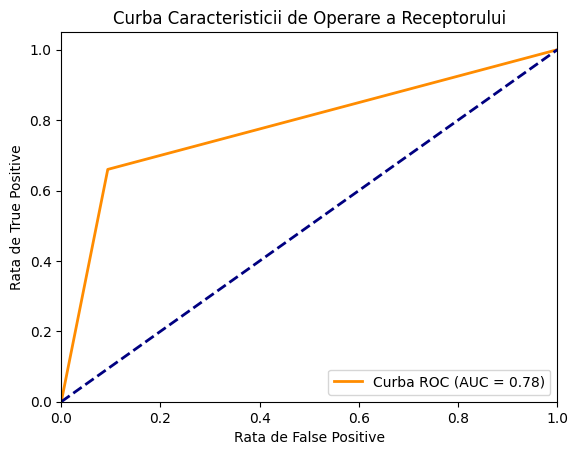

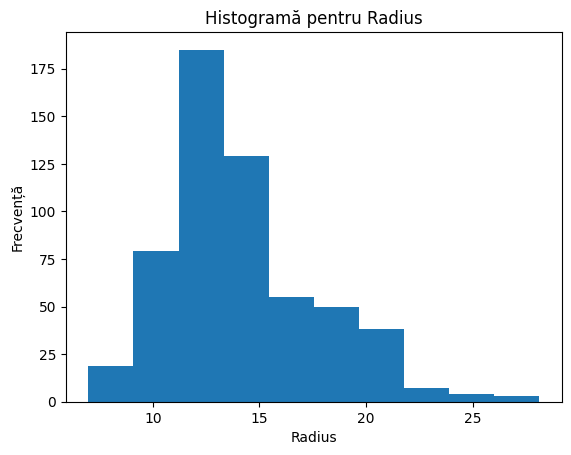

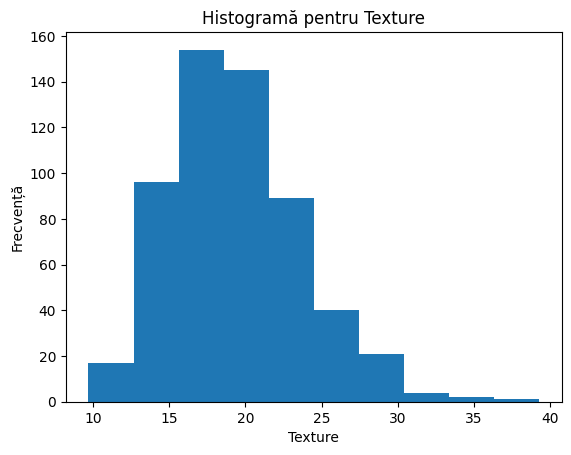

MyLogistic
Loss at iteration 0: 0.6912504218856401 (Binary Cross-Entropy Loss)
Loss at iteration 0 with threshold 0.2: 0.643956043956044 (Hinge Loss)
Loss at iteration 0 with threshold 0.2: 0.643956043956044 (Mean Squared Error)
Loss at iteration 0: 0.6912504218856401 (Binary Cross-Entropy Loss)
Loss at iteration 0 with threshold 0.5: 0.7626373626373626 (Hinge Loss)
Loss at iteration 0 with threshold 0.5: 0.10329670329670329 (Mean Squared Error)
Loss at iteration 0: 0.6912504218856401 (Binary Cross-Entropy Loss)
Loss at iteration 0 with threshold 0.9: 1.3560439560439561 (Hinge Loss)
Loss at iteration 0 with threshold 0.9: 0.35604395604395606 (Mean Squared Error)

Loss at iteration 10000: 0.21488517205151525 (Binary Cross-Entropy Loss)
Loss at iteration 10000 with threshold 0.2: 0.6879120879120879 (Hinge Loss)
Loss at iteration 10000 with threshold 0.2: 0.13186813186813187 (Mean Squared Error)
Loss at iteration 10000: 0.21488517205151525 (Binary Cross-Entropy Loss)
Loss at iteration 100

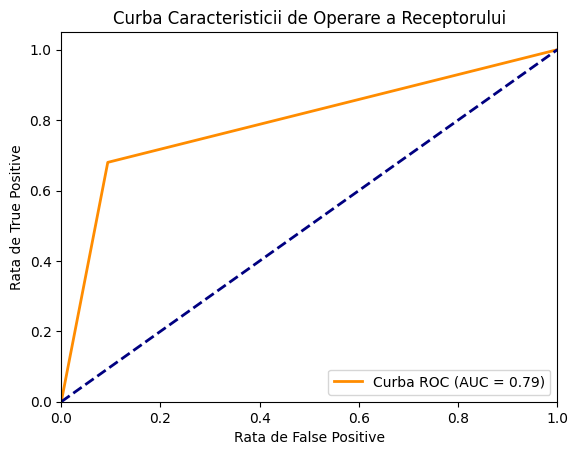

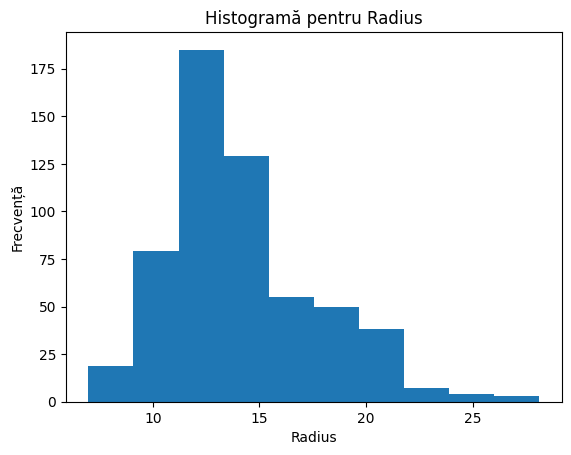

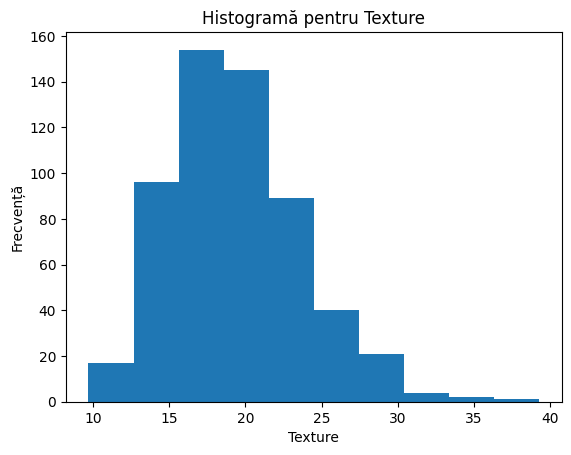

In [ ]:

import csv
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from logistic_regression import MyLogisticRegression


# Funcția pentru afișarea histogramelor datelor
def plotDataHistogram(x, variableName):
    plt.hist(x, bins=10)
    plt.title(f'Histogramă pentru {variableName}')
    plt.xlabel(variableName)
    plt.ylabel('Frecvență')
    plt.show()

# Funcția pentru încărcarea datelor din fișierul CSV
def loadDataMoreInputs(fileName, inputVariableNames, outputVariableName):
    data = []
    columnNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for idx, row in enumerate(csv_reader):
            if idx == 0:
                columnNames = row
            else:
                data.append(row)
    selectedVar1 = columnNames.index(inputVariableNames[0])
    selectedVar2 = columnNames.index(inputVariableNames[1])
    inputs = [[float(data[i][selectedVar1]), float(data[i][selectedVar2])] for i in range(len(data))]
    selectedOutput = columnNames.index(outputVariableName)
    outputs = [1 if data[i][selectedOutput] == 'M' else 0 for i in range(len(data))]
    return inputs, outputs

# Funcția pentru a trasa curba ROC
def plotROCCurve(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curba ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Rata de False Positive')
    plt.ylabel('Rata de True Positive')
    plt.title('Curba Caracteristicii de Operare a Receptorului')
    plt.legend(loc="lower right")
    plt.show()

# Funcția principală pentru clasificarea țesuturilor cancerigene
def cancerous_tissues_classification(modelType):
    crtDir = os.getcwd()
    filePath = os.path.join(crtDir, 'data', 'wdbc.csv')

    inputs, outputs = loadDataMoreInputs(filePath, ['Radius', 'Texture'], 'Diagnosis')

    # Pasul 2: Divizarea datelor în seturi de antrenament (80%) și testare (20%) și normalizarea datelor
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace=False)
    testSample = [i for i in indexes if i not in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    # Normalizare
    scaler = StandardScaler()
    scaler.fit(trainInputs)
    trainInputs = scaler.transform(trainInputs)
    testInputs = scaler.transform(testInputs)

    # Pasul 3: Antrenarea modelului
    if modelType == "tool":
        model = LogisticRegression()
        model.fit(trainInputs, trainOutputs)
        w0, w1 = model.intercept_, model.coef_[0]
        print(f"Modelul învățat: f(x) = {w0[0]} + {w1[0]} * x1 + {w1[1]} * x2")
    else:
        model = MyLogisticRegression(thresholds=[0.2, 0.5, 0.9])
        trainOutputs = np.array(trainOutputs)
        model.fit(trainInputs, trainOutputs)
        w0, w1, w2 = model.theta[0], model.theta[1], model.theta[2]
        print(f"Modelul învățat: f(x) = {w0} + {w1} * x1 + {w2} * x2")

    # Predicții
    computedTestOutputs = model.predict(testInputs)

    print(f"Acuratețe: {accuracy_score(testOutputs, computedTestOutputs)}")
    print(f"Precizie: {precision_score(testOutputs, computedTestOutputs)}")
    print(f"Recall: {recall_score(testOutputs, computedTestOutputs)}")

    # Verificarea pentru o intrare nouă
    normalized_inputs = scaler.transform([[18, 10]])
    prediction = model.predict(np.array(normalized_inputs))
    if prediction[0] == 0:
        print("Leziunea este prezisă ca benignă.")
    else:
        print("Leziunea este prezisă ca malignă.")

    # Trasează curba ROC
    fpr, tpr, thresholds = roc_curve(testOutputs, computedTestOutputs)
    roc_auc = auc(fpr, tpr)
    plotROCCurve(fpr, tpr, roc_auc)

    # Afișează histogramele caracteristicilor
    plotDataHistogram([d[0] for d in inputs], 'Radius')
    plotDataHistogram([d[1] for d in inputs], 'Texture')


print("TOOL")
cancerous_tissues_classification("tool")
print("MyLogistic")
cancerous_tissues_classification("myLogistic")